In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
sns.set_theme()

In [5]:
meta_data = pd.read_csv('Indofloods Dataset/metadata_indofloods.csv')

In [6]:
meta_data.head()

,GaugeID,Warning Level,Danger Level,Station,Latitude,Longitude,River Name/ Tributory/ SubTributory,Basin,State,Start_date,End_date,Level_Entries,Streamflow_Entries,Privacy,Source Catchment Area,Catchment Area,Area variation (%),Reliability
0,INDOFLOODS-gauge-394,259.20,262.00,Biligundulu,12.1800,77.7300,Cauvery,Cauvery,Karnataka,1971-08-30,2020-05-27,17715,17273,Open,36682.0,36889.800780,0.566493,Safe
1,INDOFLOODS-gauge-118,66.75,67.75,Jainagar,26.5833,86.1481,Ganga/Kosi/ Kamla-Balan,Ganga - Brahmaputra - Meghna/Barak,Bihar,1970-07-01,2010-12-31,14134,13725,Restricted,2131.0,2118.569336,0.583325,Safe
2,INDOFLOODS-gauge-119,49.00,50.00,Jhanjharpur,26.2333,86.2594,Ganga/Kosi/ Kamla-Balan,Ganga - Brahmaputra - Meghna/Barak,Bihar,1970-01-01,2010-12-31,14939,14616,Restricted,2945.0,3504.423584,18.995707,Safe
3,INDOFLOODS-gauge-121,70.00,71.00,DHENG BRIDGE,26.7228,85.3231,Ganga/Kosi/ Bagmati,Ganga - Brahmaputra - Meghna/Barak,Bihar,1970-07-01,2010-12-31,14762,14750,Restricted,3790.0,3580.846924,5.518551,Safe
4,INDOFLOODS-gauge-560,218.00,220.98,Burhanpur,21.2994,76.2350,Tapi,Tapi,Madhya Pradesh,1972-09-14,2019-08-20,16611,16249,Open,8487.0,8926.981445,5.184181,Safe


In [8]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   GaugeID                              214 non-null    object 
 1   Warning Level                        214 non-null    float64
 2   Danger Level                         212 non-null    float64
 3   Station                              214 non-null    object 
 4   Latitude                             214 non-null    float64
 5   Longitude                            214 non-null    float64
 6   River Name/ Tributory/ SubTributory  214 non-null    object 
 7   Basin                                212 non-null    object 
 8   State                                214 non-null    object 
 9   Start_date                           214 non-null    object 
 10  End_date                             214 non-null    object 
 11  Level_Entries                   

In [10]:
# Calculate approximate center of your stations
import folium
center_lat = meta_data['Latitude'].mean()
center_lon = meta_data['Longitude'].mean()

# Create a Folium map object
m = folium.Map(location=[center_lat, center_lon], zoom_start=5) # Adjust zoom_start as needed

In [12]:
for idx, row in meta_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Station: {row['Station']}<br>"
              f"GaugeID: {row['GaugeID']}<br>"
              f"Basin: {row['Basin']}<br>"
              f"State: {row['State']}<br>"
              f"Warning Level: {row['Warning Level']}"
    ).add_to(m)

In [13]:
m

State
Maharashtra                                 29
Kerala                                      26
Karnataka                                   23
Uttar Pradesh                               22
Tamil Nadu                                  18
West Bengal                                 17
Madhya Pradesh                              14
Bihar                                       12
Odisha                                      11
Rajasthan                                    9
Telangana                                    8
Uttarakhand                                  6
Andhra Pradesh                               6
Gujarat                                      6
Delhi                                        1
Chhattisgarh                                 1
Jharkhand                                    1
Haryana                                      1
Dadra and Nagar Haveli and Daman and Diu     1
Himachal Pradesh                             1
Tripura                                      1
Name: c

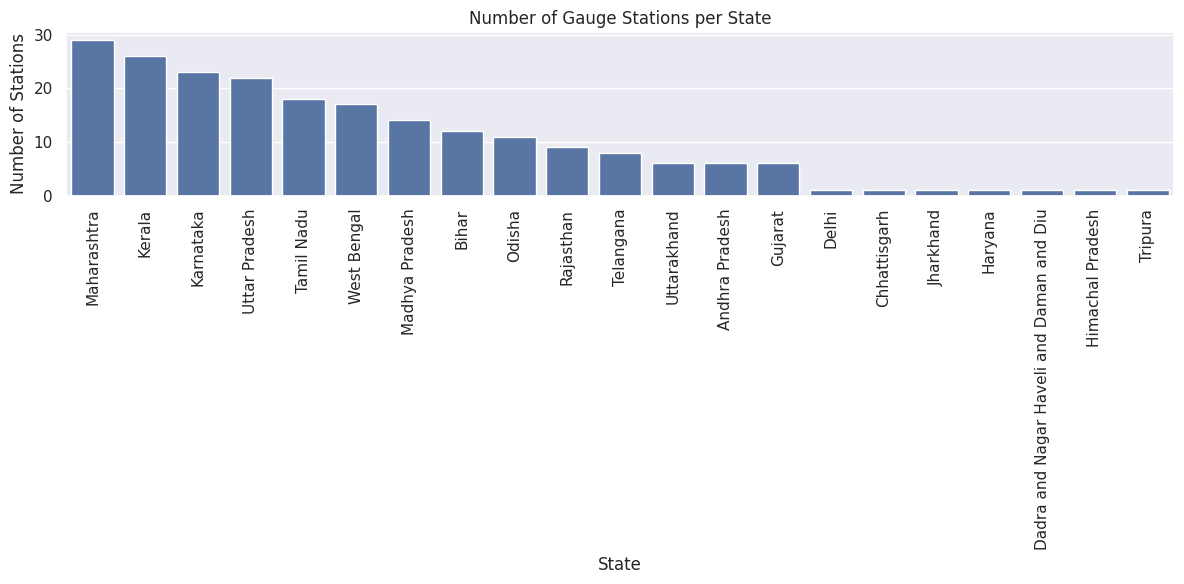

In [16]:
## Stations per state
state_counts = meta_data['State'].value_counts()
print(state_counts)
plt.figure(figsize=(12, 6)) # Adjust figure size as needed
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Number of Gauge Stations per State')
plt.xlabel('State')
plt.ylabel('Number of Stations')
plt.xticks(rotation=90) # Rotate state names for better readability if many states
plt.tight_layout()
plt.show()

In [18]:
basin_counts = meta_data['Basin'].value_counts()
print(basin_counts)

Basin
Ganga - Brahmaputra - Meghna/Barak                             39
Krishna                                                        30
West Flowing Rivers From Tadri to Kanyakumari                  20
Ganga - Brahmaputra - Meghna                                   18
Cauvery                                                        15
Godavari                                                       14
Ganga - Brahmaputra -Meghna/Barak                              13
West flowing rivers from Tadri to Kanyakumari                  12
Tapi                                                            7
East flowing rivers between Pennar Kanyakumari                  6
Narmada                                                         5
Ganga                                                           5
West flowing rivers from Tapi of Tadri                          5
West flowing rivers from  Tapi to Tadri                         4
East flowing rivers between Mahanadi and Pennar                 4
Suba

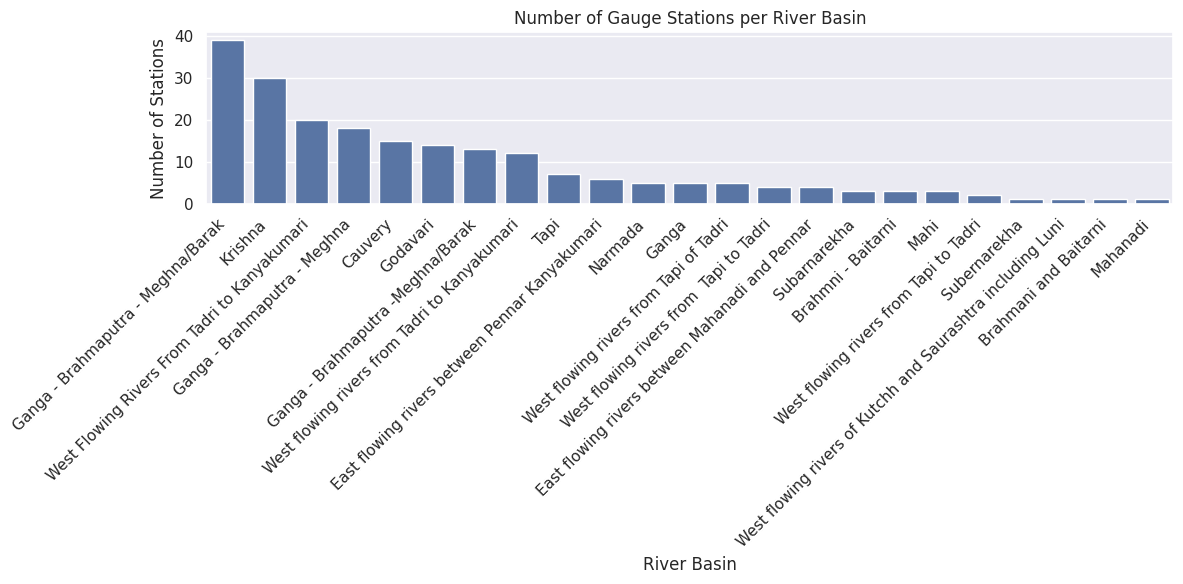

In [19]:
plt.figure(figsize=(12, 6)) # Adjust figure size as needed
sns.barplot(x=basin_counts.index, y=basin_counts.values)
plt.title('Number of Gauge Stations per River Basin')
plt.xlabel('River Basin')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45, ha='right') # Rotate basin names for better readability
plt.tight_layout()
plt.show()

In [20]:
reliability_counts = meta_data['Reliability'].value_counts()
print(reliability_counts)

Reliability
Safe       186
Caution     28
Name: count, dtype: int64


/tmp/ipykernel_910/3021136956.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reliability_counts.index, y=reliability_counts.values, palette='viridis')


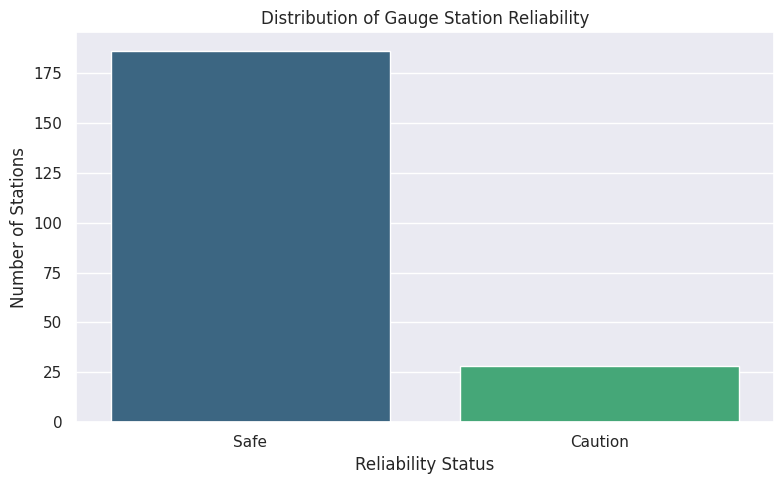

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5)) # Adjust figure size as needed
sns.barplot(x=reliability_counts.index, y=reliability_counts.values, palette='viridis')
plt.title('Distribution of Gauge Station Reliability')
plt.xlabel('Reliability Status')
plt.ylabel('Number of Stations')
plt.tight_layout()
plt.show()

In [22]:
flood_events = pd.read_csv('Indofloods Dataset/floodevents_indofloods.csv')

In [23]:
flood_events.head()

,EventID,Start Date,End Date,Peak Flood Level (m),Peak FL Date,Num Peak FL,Peak Discharge Q (cumec),Peak Discharge Date,Flood Volume (cumec),Event Duration (days),Time to Peak (days),Recession Time (day),Flood Type
0,INDOFLOODS-gauge-1010-1,2010-07-21,2010-07-21,47.95,2010-07-21,1,NaN,NaN,NaN,1,1,1,Flood
1,INDOFLOODS-gauge-1010-2,2016-07-23,2016-07-23,48.05,2016-07-23,1,NaN,NaN,NaN,1,1,1,Flood
2,INDOFLOODS-gauge-1010-3,2016-07-26,2016-07-26,48.00,2016-07-26,1,NaN,NaN,NaN,1,1,1,Flood
3,INDOFLOODS-gauge-1010-4,2017-08-11,2017-08-13,48.95,2017-08-12,1,NaN,NaN,NaN,3,2,2,Severe Flood
4,INDOFLOODS-gauge-1012-1,2010-07-21,2010-07-21,48.10,2010-07-21,1,NaN,NaN,NaN,1,1,1,Flood


In [24]:
flood_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EventID                   4548 non-null   object 
 1   Start Date                4548 non-null   object 
 2   End Date                  4548 non-null   object 
 3   Peak Flood Level (m)      4548 non-null   float64
 4   Peak FL Date              4548 non-null   object 
 5   Num Peak FL               4548 non-null   int64  
 6   Peak Discharge Q (cumec)  3993 non-null   float64
 7   Peak Discharge Date       3993 non-null   object 
 8   Flood Volume (cumec)      3971 non-null   float64
 9   Event Duration (days)     4548 non-null   int64  
 10  Time to Peak (days)       4548 non-null   int64  
 11  Recession Time (day)      4548 non-null   int64  
 12  Flood Type                4548 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 462.0+ KB


Flood Type
Flood           2919
Severe Flood    1629
Name: count, dtype: int64


/tmp/ipykernel_910/3325976982.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flood_type_counts.index, y=flood_type_counts.values, palette='coolwarm')


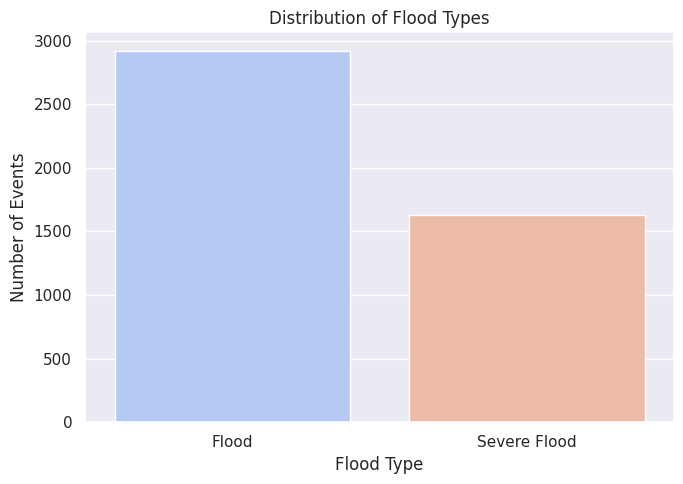

In [26]:
flood_type_counts = flood_events['Flood Type'].value_counts()
print(flood_type_counts)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.barplot(x=flood_type_counts.index, y=flood_type_counts.values, palette='coolwarm')
plt.title('Distribution of Flood Types')
plt.xlabel('Flood Type')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

In [37]:
# Assuming your flood events DataFrame is named 'flood_events'
# This creates a new column 'GaugeID_Extracted'
flood_events['GaugeID_Extracted'] = flood_events['EventID'].apply(lambda x: '-'.join(x.split('-')[:3]))

# Display a few rows to confirm the extraction
flood_events[['EventID', 'GaugeID_Extracted']].head()

,EventID,GaugeID_Extracted
0,INDOFLOODS-gauge-1010-1,INDOFLOODS-gauge-1010
1,INDOFLOODS-gauge-1010-2,INDOFLOODS-gauge-1010
2,INDOFLOODS-gauge-1010-3,INDOFLOODS-gauge-1010
3,INDOFLOODS-gauge-1010-4,INDOFLOODS-gauge-1010
4,INDOFLOODS-gauge-1012-1,INDOFLOODS-gauge-1012


In [39]:
flood_counts_per_gauge = flood_events['GaugeID_Extracted'].value_counts()
print(flood_counts_per_gauge)

# You might also want to sort it to easily find the top ones
top_flood_gauges = flood_counts_per_gauge.sort_values(ascending=False)
top_flood_gauges.head() # Print the top few

GaugeID_Extracted
INDOFLOODS-gauge-394    419
INDOFLOODS-gauge-560    268
INDOFLOODS-gauge-571    242
INDOFLOODS-gauge-361    219
INDOFLOODS-gauge-364    175
                       ... 
INDOFLOODS-gauge-705      1
INDOFLOODS-gauge-877      1
INDOFLOODS-gauge-832      1
INDOFLOODS-gauge-913      1
INDOFLOODS-gauge-889      1
Name: count, Length: 155, dtype: int64


GaugeID_Extracted
INDOFLOODS-gauge-394    419
INDOFLOODS-gauge-560    268
INDOFLOODS-gauge-571    242
INDOFLOODS-gauge-361    219
INDOFLOODS-gauge-364    175
Name: count, dtype: int64

In [41]:
# Assuming 'top_flood_gauges' is already sorted in descending order
top_n = 20 # You can adjust this number
top_stations_for_plot = top_flood_gauges.head(top_n)

print(top_stations_for_plot)

GaugeID_Extracted
INDOFLOODS-gauge-394     419
INDOFLOODS-gauge-560     268
INDOFLOODS-gauge-571     242
INDOFLOODS-gauge-361     219
INDOFLOODS-gauge-364     175
INDOFLOODS-gauge-349     169
INDOFLOODS-gauge-429     155
INDOFLOODS-gauge-427     135
INDOFLOODS-gauge-396     131
INDOFLOODS-gauge-29      127
INDOFLOODS-gauge-130     123
INDOFLOODS-gauge-1059     84
INDOFLOODS-gauge-85       83
INDOFLOODS-gauge-397      78
INDOFLOODS-gauge-739      78
INDOFLOODS-gauge-372      73
INDOFLOODS-gauge-679      70
INDOFLOODS-gauge-643      69
INDOFLOODS-gauge-32       65
INDOFLOODS-gauge-650      65
Name: count, dtype: int64


/tmp/ipykernel_910/2249574781.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stations_for_plot.index, y=top_stations_for_plot.values, palette='viridis')


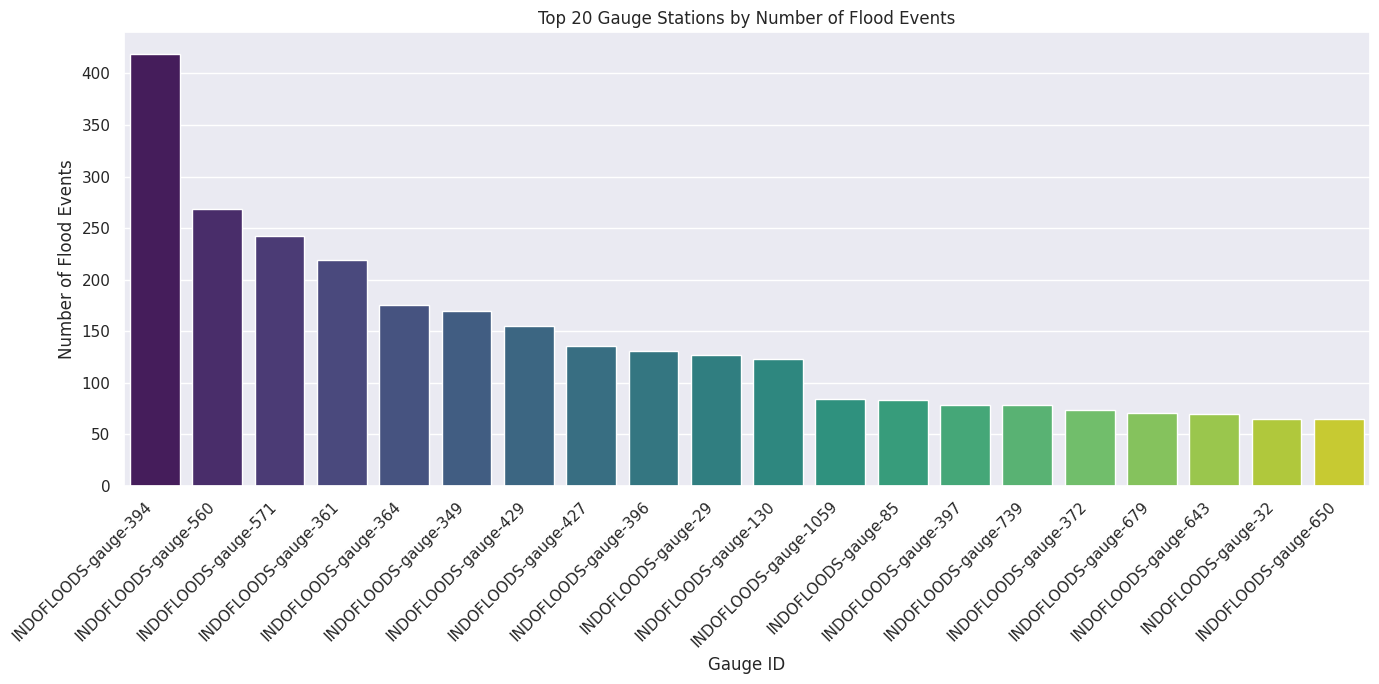

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7)) # Adjust figure size for better readability
sns.barplot(x=top_stations_for_plot.index, y=top_stations_for_plot.values, palette='viridis')
plt.title(f'Top {top_n} Gauge Stations by Number of Flood Events')
plt.xlabel('Gauge ID')
plt.ylabel('Number of Flood Events')
plt.xticks(rotation=45, ha='right') # Rotate labels to prevent overlap
plt.tight_layout()
plt.show()

In [43]:
# Assuming 'flood_events' is your original DataFrame
# And you have already created 'GaugeID_Extracted' column

selected_station_id = 'INDOFLOODS-gauge-394'
station_flood_data = flood_events[flood_events['GaugeID_Extracted'] == selected_station_id].copy()

# Convert date columns to datetime objects for temporal analysis
# Replace with actual column names from your .info() if different
date_cols = ['Start Date', 'End Date', 'Peak FL Date', 'Peak Discharge Date']
for col in date_cols:
    # Use errors='coerce' to turn unparseable dates into NaT (Not a Time)
    station_flood_data[col] = pd.to_datetime(station_flood_data[col], errors='coerce')

# Display info for the filtered data to check (optional)
print(station_flood_data.info())
print(station_flood_data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, 1491 to 1909
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EventID                   419 non-null    object        
 1   Start Date                419 non-null    datetime64[ns]
 2   End Date                  419 non-null    datetime64[ns]
 3   Peak Flood Level (m)      419 non-null    float64       
 4   Peak FL Date              419 non-null    datetime64[ns]
 5   Num Peak FL               419 non-null    int64         
 6   Peak Discharge Q (cumec)  419 non-null    float64       
 7   Peak Discharge Date       419 non-null    datetime64[ns]
 8   Flood Volume (cumec)      419 non-null    float64       
 9   Event Duration (days)     419 non-null    int64         
 10  Time to Peak (days)       419 non-null    int64         
 11  Recession Time (day)      419 non-null    int64         
 12  Flood Type             

In [45]:
station_flood_data.head()

,EventID,Start Date,End Date,Peak Flood Level (m),Peak FL Date,Num Peak FL,Peak Discharge Q (cumec),Peak Discharge Date,Flood Volume (cumec),Event Duration (days),Time to Peak (days),Recession Time (day),Flood Type,GaugeID_Extracted
1491,INDOFLOODS-gauge-394-1,1971-08-30,1971-09-13,260.29,1971-08-30,1,745.0,1971-08-30,6915.6,15,1,15,Flood,INDOFLOODS-gauge-394
1492,INDOFLOODS-gauge-394-2,1971-09-16,1971-10-03,261.26,1971-09-22,1,1011.2,1971-09-22,11553.0,18,7,12,Flood,INDOFLOODS-gauge-394
1493,INDOFLOODS-gauge-394-3,1971-10-05,1971-10-06,259.32,1971-10-06,1,474.6,1971-10-05,906.2,2,2,1,Flood,INDOFLOODS-gauge-394
1494,INDOFLOODS-gauge-394-4,1971-10-11,1971-10-17,261.64,1971-10-11,1,1235.0,1971-10-11,5462.2,7,1,7,Flood,INDOFLOODS-gauge-394
1495,INDOFLOODS-gauge-394-5,1971-10-20,1971-10-30,260.17,1971-10-23,1,700.0,1971-10-23,5149.6,11,4,8,Flood,INDOFLOODS-gauge-394


In [46]:
station_flood_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, 1491 to 1909
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EventID                   419 non-null    object        
 1   Start Date                419 non-null    datetime64[ns]
 2   End Date                  419 non-null    datetime64[ns]
 3   Peak Flood Level (m)      419 non-null    float64       
 4   Peak FL Date              419 non-null    datetime64[ns]
 5   Num Peak FL               419 non-null    int64         
 6   Peak Discharge Q (cumec)  419 non-null    float64       
 7   Peak Discharge Date       419 non-null    datetime64[ns]
 8   Flood Volume (cumec)      419 non-null    float64       
 9   Event Duration (days)     419 non-null    int64         
 10  Time to Peak (days)       419 non-null    int64         
 11  Recession Time (day)      419 non-null    int64         
 12  Flood Type             

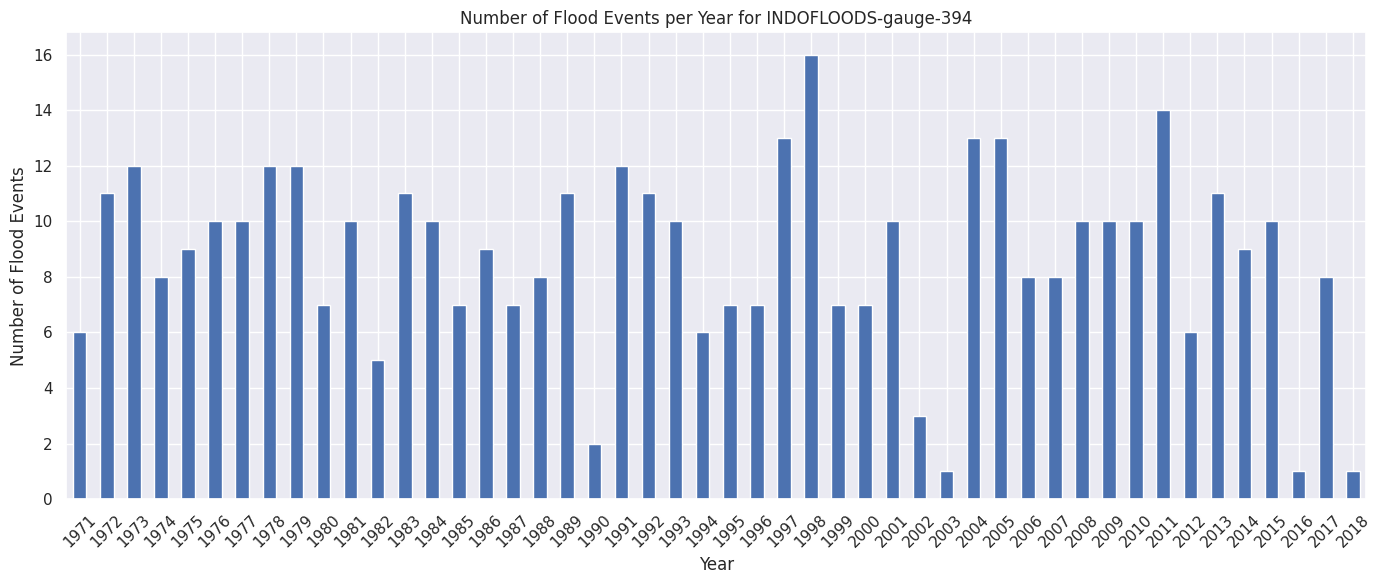

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Make sure pandas is imported

# Assuming 'station_flood_data' is your filtered DataFrame
plt.figure(figsize=(14, 6))
station_flood_data['Start Date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title(f'Number of Flood Events per Year for INDOFLOODS-gauge-394')
plt.xlabel('Year')
plt.ylabel('Number of Flood Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_910/2718425864.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duration_counts.index, y=duration_counts.values, palette='viridis')


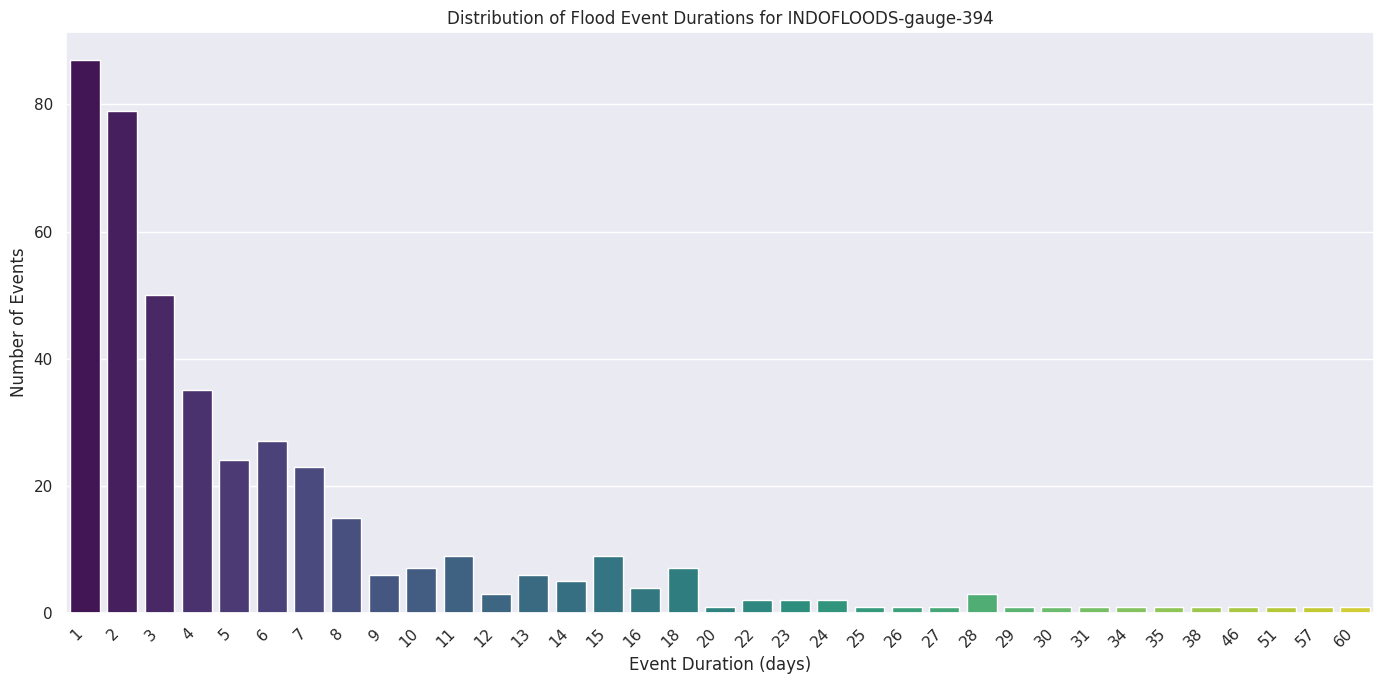

count    419.000000
mean       6.112172
std        7.808983
min        1.000000
25%        2.000000
50%        3.000000
75%        7.000000
max       60.000000
Name: Event Duration (days), dtype: float64


In [48]:
# Assuming 'station_flood_data' is your filtered DataFrame for INDOFLOODS-gauge-394

# Calculate the value counts for Event Duration and sort by duration (index)
duration_counts = station_flood_data['Event Duration (days)'].value_counts().sort_index()

plt.figure(figsize=(14, 7)) # Increased figure size to provide more space
sns.barplot(x=duration_counts.index, y=duration_counts.values, palette='viridis')
plt.title(f'Distribution of Flood Event Durations for INDOFLOODS-gauge-394')
plt.xlabel('Event Duration (days)')
plt.ylabel('Number of Events')

# Adjust x-axis ticks for better readability if there are many unique duration values
# We can show ticks at intervals (e.g., every 2nd or 5th day)
# Or just let matplotlib/seaborn decide, if the range is not too extreme.
# If the range is very wide, manual selection is better.
# Example: Show ticks for every 2nd day, or a custom list if there are specific durations you want highlighted.
# For example, if max duration is 15, range(0, 16, 2) would give 0, 2, 4, ..., 14
if duration_counts.index.max() > 10: # Only if durations are somewhat spread
    plt.xticks(rotation=45, ha='right') # Rotate labels if still crowded
    # Optionally, set specific ticks if needed:
    # tick_interval = max(1, int(len(duration_counts.index) / 10)) # Adjust interval dynamically
    # plt.gca().set_xticks(duration_counts.index[::tick_interval])
    # plt.gca().set_xticklabels(duration_counts.index[::tick_interval])

plt.tight_layout()
plt.show()

print(station_flood_data['Event Duration (days)'].describe())

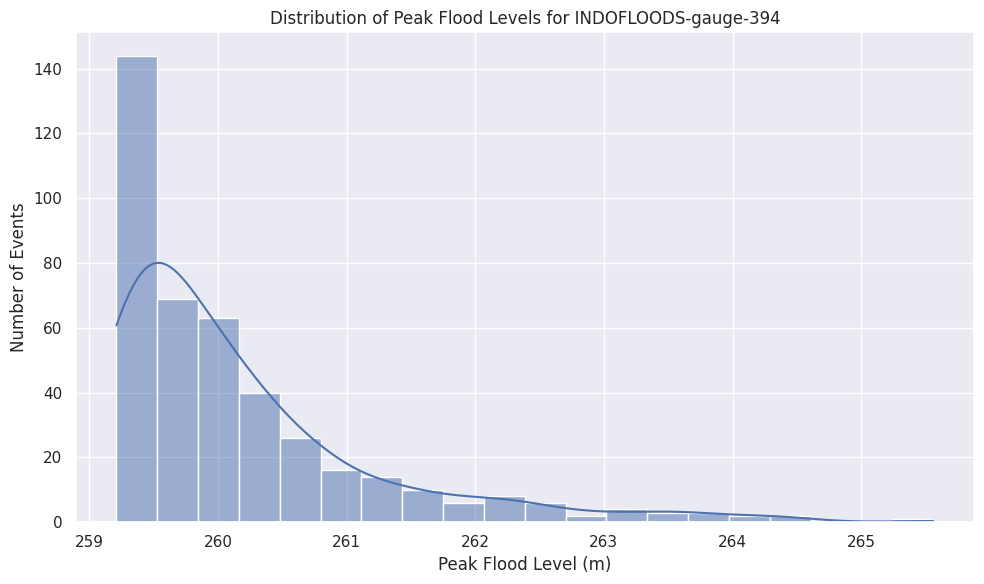

count    419.000000
mean     260.168186
std        1.071572
min      259.210000
25%      259.430000
50%      259.810000
75%      260.465000
max      265.560000
Name: Peak Flood Level (m), dtype: float64


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Assuming 'station_flood_data' is your filtered DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(station_flood_data['Peak Flood Level (m)'], bins=20, kde=True) # Adjust bins as needed for this specific station's range
plt.title(f'Distribution of Peak Flood Levels for INDOFLOODS-gauge-394')
plt.xlabel('Peak Flood Level (m)')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

print(station_flood_data['Peak Flood Level (m)'].describe())

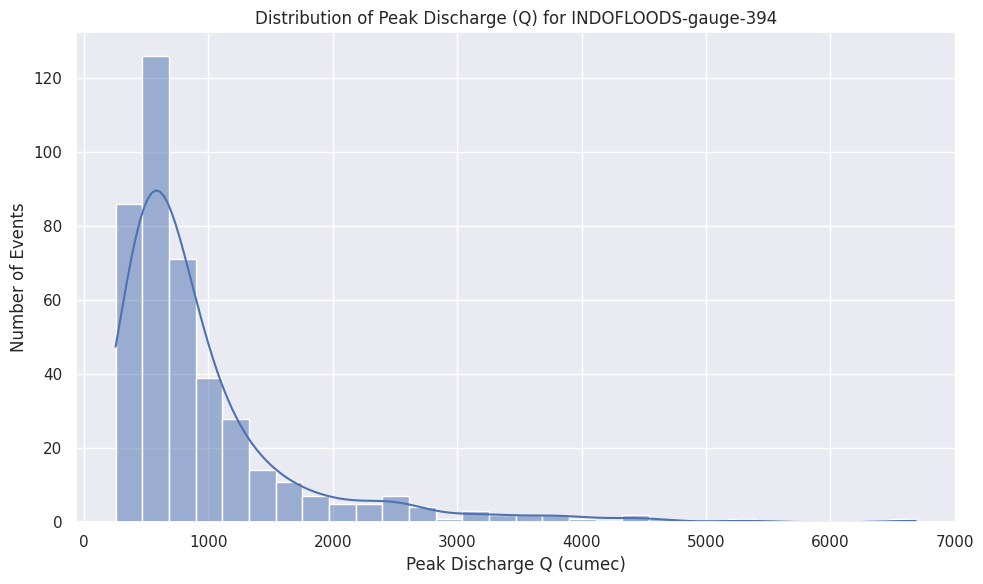

count     419.000000
mean      952.166038
std       801.260670
min       253.700000
25%       490.525000
50%       674.800000
75%      1055.310000
max      6688.000000
Name: Peak Discharge Q (cumec), dtype: float64


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Assuming 'station_flood_data' is your filtered DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(station_flood_data['Peak Discharge Q (cumec)'], bins=30, kde=True)
plt.title(f'Distribution of Peak Discharge (Q) for INDOFLOODS-gauge-394')
plt.xlabel('Peak Discharge Q (cumec)')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

print(station_flood_data['Peak Discharge Q (cumec)'].describe())

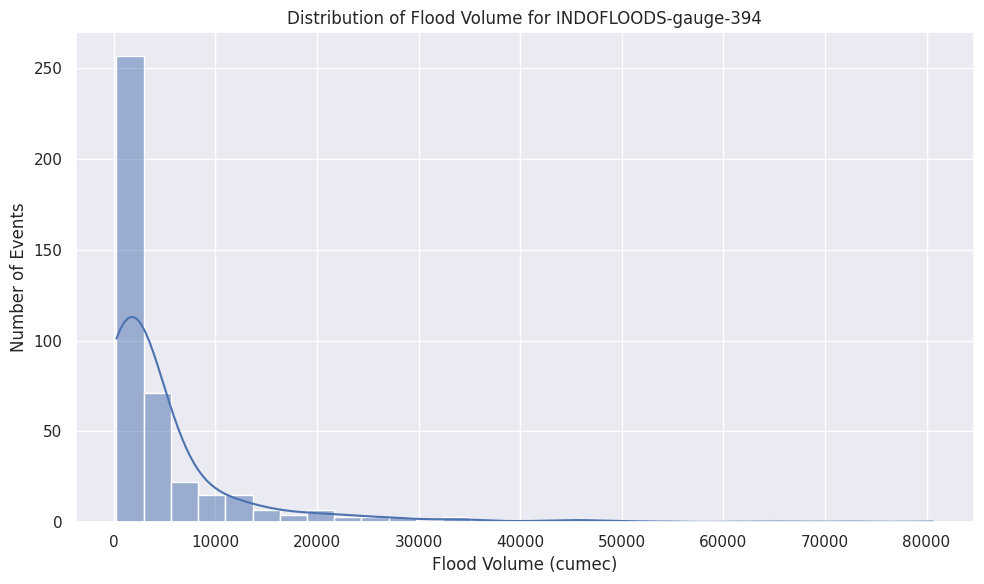

count      419.000000
mean      5222.200167
std       9472.426414
min        253.700000
25%        896.500000
50%       1952.800000
75%       4765.700000
max      80653.400000
Name: Flood Volume (cumec), dtype: float64


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Assuming 'station_flood_data' is your filtered DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(station_flood_data['Flood Volume (cumec)'], bins=30, kde=True)
plt.title(f'Distribution of Flood Volume for INDOFLOODS-gauge-394')
plt.xlabel('Flood Volume (cumec)')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

print(station_flood_data['Flood Volume (cumec)'].describe())

/tmp/ipykernel_910/3020726927.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_to_peak_counts.index, y=time_to_peak_counts.values, palette='plasma')


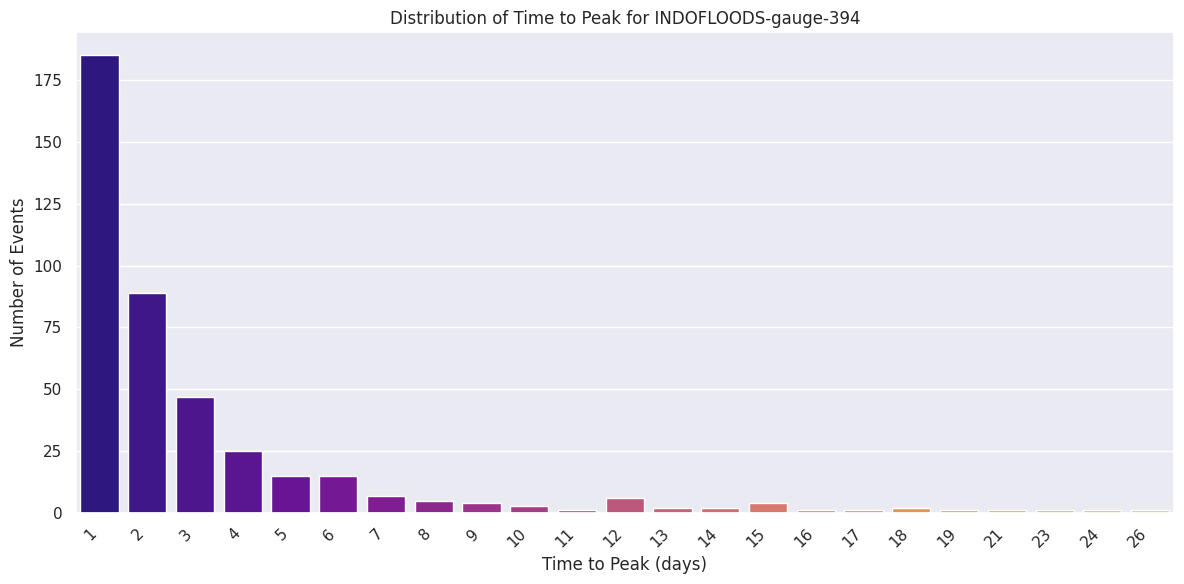

count    419.000000
mean       3.109785
std        3.758547
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       26.000000
Name: Time to Peak (days), dtype: float64


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Assuming 'station_flood_data' is your filtered DataFrame
time_to_peak_counts = station_flood_data['Time to Peak (days)'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=time_to_peak_counts.index, y=time_to_peak_counts.values, palette='plasma')
plt.title(f'Distribution of Time to Peak for INDOFLOODS-gauge-394')
plt.xlabel('Time to Peak (days)')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(station_flood_data['Time to Peak (days)'].describe())

/tmp/ipykernel_910/4121525947.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recession_time_counts.index, y=recession_time_counts.values, palette='magma')


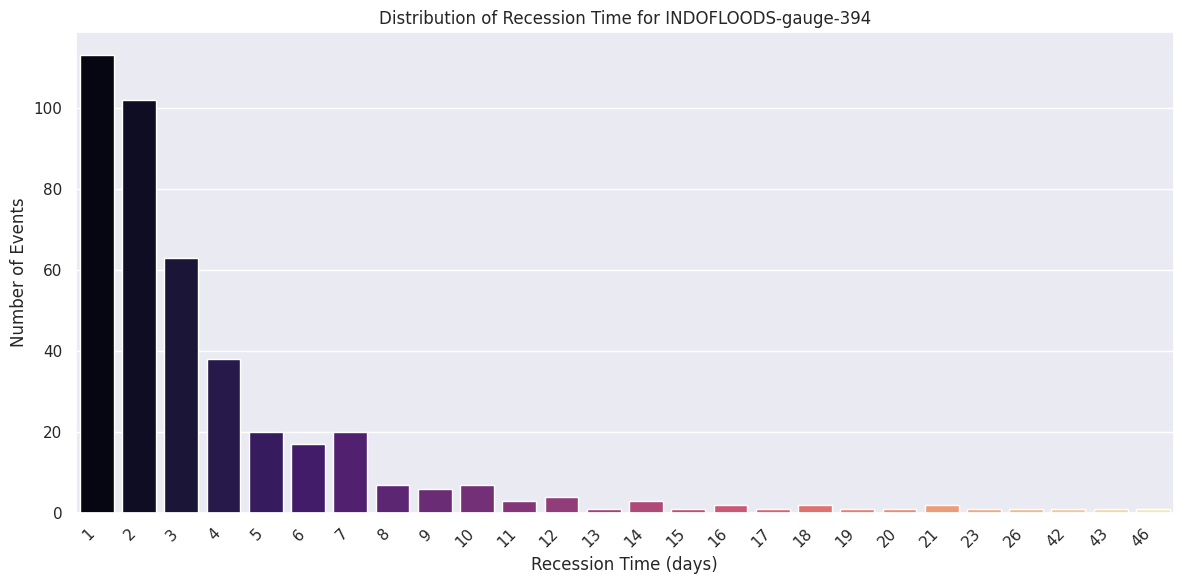

count    419.000000
mean       4.002387
std        5.049278
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       46.000000
Name: Recession Time (day), dtype: float64


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Assuming 'station_flood_data' is your filtered DataFrame
recession_time_counts = station_flood_data['Recession Time (day)'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=recession_time_counts.index, y=recession_time_counts.values, palette='magma')
plt.title(f'Distribution of Recession Time for INDOFLOODS-gauge-394')
plt.xlabel('Recession Time (days)')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(station_flood_data['Recession Time (day)'].describe())

In [56]:
meta_data[meta_data['GaugeID'] == 'INDOFLOODS-gauge-394']

,GaugeID,Warning Level,Danger Level,Station,Latitude,Longitude,River Name/ Tributory/ SubTributory,Basin,State,Start_date,End_date,Level_Entries,Streamflow_Entries,Privacy,Source Catchment Area,Catchment Area,Area variation (%),Reliability
0,INDOFLOODS-gauge-394,259.2,262.0,Biligundulu,12.18,77.73,Cauvery,Cauvery,Karnataka,1971-08-30,2020-05-27,17715,17273,Open,36682.0,36889.80078,0.566493,Safe


In [57]:
## get information from Camels Dataset for gauge_id = 5002
mean_forcings = pd.read_csv('Camels Dataset/CAMELS_IND_Catchments_Streamflow_Sufficient/catchment_mean_forcings/05002.csv')
lstm_predicted = pd.read_csv('Camels Dataset/CAMELS_IND_Catchments_Streamflow_Sufficient/streamflow_timeseries/lstm_pred_streamflow.csv')
streamflow_observed = pd.read_csv('Camels Dataset/CAMELS_IND_Catchments_Streamflow_Sufficient/streamflow_timeseries/streamflow_observed.csv')

In [ ]:
mean_forcings.head()

,year,month,day,prcp(mm/day),tmax(C),tmin(C),tavg(C),srad_lw(w/m2),srad_sw(w/m2),wind_u(m/s),wind_v(m/s),wind(m/s),rel_hum(%),pet(mm/day),pet_gleam(mm/day),aet_gleam(mm/day),evap_canopy(mm/day),evap_surface(mm/day),sm_lvl1(kg/m2),sm_lvl2(kg/m2),sm_lvl3(kg/m2),sm_lvl4(kg/m2)
0,1980,1,1,0.0,28.11,14.04,21.08,335.40,308.97,0.51,-0.20,0.55,57.89,NaN,2.85,2.03,0.0,0.79,6.93,66.29,153.43,511.52
1,1980,1,2,0.0,28.33,13.94,21.14,345.16,303.75,0.42,0.48,0.64,60.80,NaN,2.90,2.07,0.0,0.75,6.74,66.07,153.25,511.37
2,1980,1,3,0.0,28.16,14.35,21.26,349.14,300.51,0.63,0.29,0.69,61.53,NaN,2.76,1.89,0.0,0.70,6.56,65.85,153.09,511.23
3,1980,1,4,0.0,28.33,14.83,21.58,353.16,299.13,-1.65,0.79,1.83,55.99,NaN,2.71,1.81,0.0,0.73,6.39,65.64,152.91,511.09
4,1980,1,5,0.0,28.05,14.73,21.39,348.57,305.00,-1.61,0.74,1.77,52.61,NaN,2.88,1.92,0.0,0.73,6.23,65.42,152.74,510.95


In [59]:
mean_forcings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  14976 non-null  int64  
 1   month                 14976 non-null  int64  
 2   day                   14976 non-null  int64  
 3   prcp(mm/day)          14976 non-null  float64
 4   tmax(C)               14976 non-null  float64
 5   tmin(C)               14976 non-null  float64
 6   tavg(C)               14976 non-null  float64
 7   srad_lw(w/m2)         14976 non-null  float64
 8   srad_sw(w/m2)         14976 non-null  float64
 9   wind_u(m/s)           14976 non-null  float64
 10  wind_v(m/s)           14976 non-null  float64
 11  wind(m/s)             14976 non-null  float64
 12  rel_hum(%)            14976 non-null  float64
 13  pet(mm/day)           14610 non-null  float64
 14  pet_gleam(mm/day)     14976 non-null  float64
 15  aet_gleam(mm/day)  

In [61]:
lstm_predicted.head()

,year,month,day,3002,3005,3008,3009,3013,3014,3017,3018,3019,3020,3024,3028,3029,3030,3031,3038,3040,3043,3045,3047,3048,3055,3056,3057,3064,3068,3069,3071,3072,3073,3074,3075,3076,3079,3081,3082,3083,3085,3087,3089,3091,3092,3094,3098,3099,3103,3105,3107,3109,3110,4003,4004,4005,4006,4007,4012,4013,4015,4016,4017,4018,4019,4021,4022,4023,4024,4025,4026,4028,4030,4031,4032,4038,4039,4040,4041,4044,4047,4048,4049,4050,4051,4054,4055,4056,4057,4060,4061,4062,4063,4064,5001,5002,5004,5005,5007,5008,5010,5012,5013,5014,5015,5017,5018,5021,5022,5023,5024,5025,5027,5028,5029,6001,6006,6007,6008,7001,7002,7005,7007,7008,7009,7011,7015,8001,8003,8005,8006,8009,8011,8013,8016,8020,8021,8023,8028,8029,8030,8031,8034,8035,8036,8038,9001,9002,9005,9008,9009,9011,9012,10004,10005,10008,10010,10011,10013,10014,11001,11005,11006,11007,11010,12001,12004,12006,12009,12012,12015,12016,12018,12020,12025,12026,12029,12035,12036,12038,12043,12044,12046,13004,13006,13007,13008,13010,13012,13013,13016,13017,13025,14001,14003,14004,14005,14008,14009,14011,14012,14014,14015,15001,15003,15005,15006,15007,15008,15009,15010,15011,15012,15013,15014,15016,15017,15018,15019,15020,15021,15022,15023,15024,15026,15030,15031,15032,16001,16004,16007,16012,16014,17001,17003,17005,17006,17007,17009,17011,17012,17015,17019,17022,17024
0,1980,1,1,1.711,82.052,38.030,0.588,4.489,4.002,1.843,44.199,0.554,10.702,0.356,14.651,11.369,6.547,20.825,1.405,3.471,527.948,141.260,3.159,12.034,57.219,1.009,62.147,3.657,13.213,2.107,93.669,51.334,346.576,11.681,537.230,3.263,5.654,8.969,1.087,2.885,2.531,41.007,1.164,2.408,40.268,12.704,9.181,2.517,147.971,4.140,3.489,18.791,1.619,4.161,45.921,2.042,6.817,11.360,1.980,26.401,13.279,28.677,54.232,1.064,106.637,12.061,15.544,1.826,0.191,1.670,4.818,3.236,5.635,45.172,3.684,11.961,1.573,38.155,3.626,4.886,1.109,1.074,2.266,10.474,0.075,10.462,0.305,1.308,7.990,206.459,2.186,297.746,8.193,29.020,8.560,73.769,1.083,1.583,1.281,103.595,7.859,113.542,8.063,4.305,3.239,1.692,11.876,3.576,4.319,0.671,1.318,0.329,7.490,15.352,84.162,10.506,28.488,14.611,24.520,2.851,28.938,7.519,45.639,19.687,120.703,22.168,8.499,3.315,30.192,3.347,123.954,5.865,45.901,51.562,30.537,6.382,13.252,1.811,3.680,10.445,3.093,4.327,73.907,26.442,12.771,379.939,11.992,17.631,1.829,0.917,38.924,1.196,3.597,3.633,1.315,30.192,3.505,14.459,3.063,6.711,6.469,1.629,2.992,3.310,17.748,2.370,87.989,1.393,2.717,3.129,0.617,6.301,3.698,219.958,191.686,167.983,2.101,223.849,12.350,7.834,8.838,1.321,115.317,11.740,10.030,56.744,30.910,4.814,1.395,1.017,32.377,27.521,8.768,4.152,5.023,4.112,5.341,3.807,0.418,2.475,2.165,2.245,1.001,3.729,3.147,5.979,2.339,2.369,10.035,4.700,10.182,2.104,4.438,1.732,3.008,12.697,5.772,2.407,9.506,2.681,33.822,8.728,3.978,3.675,23.983,2.231,2.501,1.411,3.901,21.547,23.736,12.824,21.700,2.014,1.351,9.431,4.278,1.616,2.912,6.515,2.455,3.540,3.438,6.804,5.693
1,1980,1,2,1.436,88.766,39.583,0.450,5.418,3.931,2.411,48.792,0.564,6.833,0.122,14.382,7.305,5.986,22.233,1.352,3.650,631.688,206.406,3.297,13.035,55.019,1.025,74.198,3.627,16.235,1.469,110.103,52.325,397.211,12.018,644.050,3.744,5.016,8.412,0.778,2.756,2.462,43.270,0.973,2.577,64.400,13.244,6.749,2.776,166.378,4.838,4.632,13.339,1.278,1.845,40.764,1.863,7.574,12.961,1.650,27.068,17.304,36.014,68.425,0.865,118.620,16.928,15.645,1.306,0.075,1.208,1.570,3.795,5.851,40.654,2.388,7.814,1.455,39.207,4.316,5.179,0.459,0.407,1.612,12.405,0.023,5.809,0.143,0.278,6.252,206.277,1.176,365.859,10.664,24.261,8.750,98.157,0.607,1.599,1.021,146.611,10.860,155.269,11.030,2.818,3.649,2.001,15.123,3.853,5.286,0.355,1.355,0.299,7.024,18.175,113.175,15.309,43.557,25.107,37.406,3.734,44.947,13.064,76.503,36.102,193.957,39.516,15.481,3.567,44.321,3.489,149.086,6.030,46.252,75.809,45.437,5.073,19.352,2.069,4.271,10.737,2.865,4.146,78.168,28.553,21.548,508.966,12.790,14.381,0.877,0.538,38.372,0.490,2.197,3.021,1.176,24.096,2.445,12.371,2.284,5.710,6.184,1.489,2.678,2.990,14.962,1.600,120.642,1.244,1.628,3.075,0.44

In [62]:
lstm_predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Columns: 245 entries, year to 17024
dtypes: float64(242), int64(3)
memory usage: 28.0 MB


In [63]:
streamflow_observed.head()

,year,month,day,3002,3005,3008,3009,3013,3014,3017,3018,3019,3020,3024,3028,3029,3030,3031,3038,3040,3043,3045,3047,3048,3055,3056,3057,3064,3068,3069,3071,3072,3073,3074,3075,3076,3079,3081,3082,3083,3085,3087,3089,3091,3092,3094,3098,3099,3103,3105,3107,3109,3110,4003,4004,4005,4006,4007,4012,4013,4015,4016,4017,4018,4019,4021,4022,4023,4024,4025,4026,4028,4030,4031,4032,4038,4039,4040,4041,4044,4047,4048,4049,4050,4051,4054,4055,4056,4057,4060,4061,4062,4063,4064,5001,5002,5004,5005,5007,5008,5010,5012,5013,5014,5015,5017,5018,5021,5022,5023,5024,5025,5027,5028,5029,6001,6006,6007,6008,7001,7002,7005,7007,7008,7009,7011,7015,8001,8003,8005,8006,8009,8011,8013,8016,8020,8021,8023,8028,8029,8030,8031,8034,8035,8036,8038,9001,9002,9005,9008,9009,9011,9012,10004,10005,10008,10010,10011,10013,10014,11001,11005,11006,11007,11010,12001,12004,12006,12009,12012,12015,12016,12018,12020,12025,12026,12029,12035,12036,12038,12043,12044,12046,13004,13006,13007,13008,13010,13012,13013,13016,13017,13025,14001,14003,14004,14005,14008,14009,14011,14012,14014,14015,15001,15003,15005,15006,15007,15008,15009,15010,15011,15012,15013,15014,15016,15017,15018,15019,15020,15021,15022,15023,15024,15026,15030,15031,15032,16001,16004,16007,16012,16014,17001,17003,17005,17006,17007,17009,17011,17012,17015,17019,17022,17024
0,1980,1,1,NaN,23.2,36.1,NaN,NaN,NaN,NaN,30.7,NaN,12.80,NaN,13.7,15.1,NaN,22.4,NaN,NaN,435.00,173.0,NaN,NaN,47.00,NaN,35.6,NaN,21.6,NaN,50.7,15.1,238.0,13.8,405.9,NaN,5.7,NaN,NaN,NaN,2.3,NaN,NaN,NaN,23.30,NaN,1.20,NaN,72.8,NaN,NaN,27.2,NaN,0.0,4.0,NaN,NaN,6.9,NaN,41.8,NaN,NaN,68.60,1.0,NaN,7.4,4.3,NaN,1.4,NaN,0.0,NaN,NaN,39.5,3.4,58.7,NaN,18.8,4.7,NaN,0.0,0.0,8.0,16.9,0.6,64.7,NaN,0.0,13.8,40.4,15.6,181.5,0.6,116.0,NaN,111.1,NaN,NaN,1.9,589.1,20.8,462.2,15.1,16.1,10.6,NaN,35.8,NaN,13.4,NaN,NaN,NaN,8.6,23.7,496.92,1.1,2.93,NaN,0.68,NaN,8.71,NaN,12.24,6.42,20.187,NaN,2.31,1.4,3.61,0.68,24.54,0.96,11.63,10.01,3.1,0.63,5.1,NaN,NaN,2.01,0.04,0.4,NaN,7.53,2.6,52.78,NaN,NaN,NaN,NaN,NaN,1.75,8.8,NaN,NaN,8.5,NaN,5.7,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,13.1,0.9,0.6,1.5,NaN,NaN,2.9,102.7,64.7,44.3,3.0,84.2,2.5,0.8,2.6,NaN,27.2,7.93,3.200,327.0,NaN,5.62,2.6,0.2,41.8,34.1,12.8,NaN,2.6,6.40,8.000,2.35,NaN,NaN,NaN,NaN,NaN,NaN,18.6,12.1,NaN,7.1,34.2,NaN,NaN,NaN,NaN,NaN,NaN,27.0,20.3,NaN,NaN,NaN,24.0,14.2,NaN,NaN,50.9,4.8,NaN,NaN,NaN,NaN,8.7,NaN,NaN,NaN,2.2,2.00,3.8,NaN,NaN,12.2,2.7,0.8,23.7,10.3,18.0
1,1980,1,2,NaN,22.0,36.0,NaN,NaN,NaN,NaN,31.3,NaN,12.30,NaN,13.2,15.3,NaN,21.8,NaN,NaN,432.82,159.6,NaN,NaN,47.43,NaN,34.6,NaN,22.3,NaN,49.6,15.3,229.4,13.7,398.3,NaN,5.7,NaN,NaN,NaN,2.1,NaN,NaN,NaN,22.50,NaN,1.10,NaN,80.8,NaN,NaN,27.2,NaN,0.0,4.0,NaN,NaN,7.3,NaN,40.5,NaN,NaN,68.60,0.9,NaN,9.2,4.1,NaN,1.5,NaN,0.0,NaN,NaN,38.3,3.1,60.2,NaN,20.3,5.0,NaN,0.0,0.0,9.1,15.0,0.6,67.9,NaN,0.0,10.9,37.7,14.8,165.5,1.0,112.8,NaN,113.4,NaN,NaN,1.5,609.3,20.5,468.5,12.9,15.0,189.3,NaN,36.2,NaN,15.3,NaN,NaN,NaN,7.5,24.2,528.23,1.1,2.84,NaN,0.63,NaN,7.01,NaN,12.14,5.80,19.584,NaN,2.46,1.6,3.60,0.57,24.75,0.97,12.20,9.73,3.0,0.79,5.1,NaN,NaN,1.59,0.04,0.5,NaN,7.25,2.5,47.30,NaN,NaN,NaN,NaN,NaN,1.88,9.2,NaN,NaN,11.2,NaN,6.3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,10.5,0.9,0.7,1.4,NaN,NaN,2.9,108.0,63.7,42.7,3.3,84.4,2.5,0.8,2.6,NaN,28.5,8.07,3.372,300.0,NaN,5.51,2.6,0.5,30.3,32.9,11.7,NaN,2.9,2.70,7.803,1.73,NaN,NaN,NaN,NaN,NaN,NaN,19.6,12.2,NaN,6.5,33.4,NaN,NaN,NaN,NaN,NaN,NaN,25.8,19.2,NaN,NaN,NaN,33.4,12.8,NaN,NaN,53.8,4.5,NaN,NaN,NaN,NaN,8.2,NaN,NaN,NaN,2.1,1.96,3.5,NaN,NaN,7.2,2.5,0.7,24.0,12.6,18.0
2,1980,1,3,NaN,21.4,36.0,NaN,NaN,NaN,NaN,30.0,NaN,11.10,NaN,13.2,14.6,NaN,21.8,NaN,NaN,424.14,155.7,NaN,NaN,46.58,NaN,34.6,NaN,22.0,NaN,48.7,14.9,219.1,12.8,386.0,NaN,5.8,NaN,NaN,NaN,2.1,NaN,NaN,NaN,22.51,NaN,1.24,NaN,76.8,NaN,NaN,25.6,NaN,0.0,3.0,NaN,NaN,11.9,NaN,35.5,NaN,NaN,72.40,1.0,NaN,6.7,3.9,NaN,1.3,NaN,0.0,NaN,NaN,41.2,3.1,69.4,NaN,46.1,7.8,NaN,0.0,0.0,9.4,10.0,0.6,69.0,NaN,0.0,10.8,36.1,14.0,186.7,0.8,112.6,NaN,104.3,NaN,NaN,1.6,591.3,20.5,484.9,14.3,13.6,10.4,NaN,37.7,NaN

In [67]:
streamflow_observed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5002    14227 non-null  float64
dtypes: float64(1)
memory usage: 117.1 KB


In [69]:
## select only station 5002 data
streamflow_observed = streamflow_observed[['5002']]
lstm_predicted = lstm_predicted[['5002']]
streamflow_observed.rename(columns={'5002' : 'streamflow_observed'} , inplace=True)
lstm_predicted.rename(columns={'5002' : 'lstm_streamflow'} , inplace=True)

In [70]:
## merge the dataset columns
mean_forcings['lstm_streamflow'] = lstm_predicted['lstm_streamflow']
mean_forcings['streamflow_observed'] = streamflow_observed['streamflow_observed']

In [71]:
mean_forcings.head()

,year,month,day,prcp(mm/day),tmax(C),tmin(C),tavg(C),srad_lw(w/m2),srad_sw(w/m2),wind_u(m/s),wind_v(m/s),wind(m/s),rel_hum(%),pet(mm/day),pet_gleam(mm/day),aet_gleam(mm/day),evap_canopy(mm/day),evap_surface(mm/day),sm_lvl1(kg/m2),sm_lvl2(kg/m2),sm_lvl3(kg/m2),sm_lvl4(kg/m2),lstm_streamflow,streamflow_observed
0,1980,1,1,0.0,28.11,14.04,21.08,335.40,308.97,0.51,-0.20,0.55,57.89,NaN,2.85,2.03,0.0,0.79,6.93,66.29,153.43,511.52,73.769,111.1
1,1980,1,2,0.0,28.33,13.94,21.14,345.16,303.75,0.42,0.48,0.64,60.80,NaN,2.90,2.07,0.0,0.75,6.74,66.07,153.25,511.37,98.157,113.4
2,1980,1,3,0.0,28.16,14.35,21.26,349.14,300.51,0.63,0.29,0.69,61.53,NaN,2.76,1.89,0.0,0.70,6.56,65.85,153.09,511.23,121.992,104.3
3,1980,1,4,0.0,28.33,14.83,21.58,353.16,299.13,-1.65,0.79,1.83,55.99,NaN,2.71,1.81,0.0,0.73,6.39,65.64,152.91,511.09,133.136,104.1
4,1980,1,5,0.0,28.05,14.73,21.39,348.57,305.00,-1.61,0.74,1.77,52.61,NaN,2.88,1.92,0.0,0.73,6.23,65.42,152.74,510.95,133.301,103.7


In [73]:
station_flood_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, 1491 to 1909
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EventID                   419 non-null    object        
 1   Start Date                419 non-null    datetime64[ns]
 2   End Date                  419 non-null    datetime64[ns]
 3   Peak Flood Level (m)      419 non-null    float64       
 4   Peak FL Date              419 non-null    datetime64[ns]
 5   Num Peak FL               419 non-null    int64         
 6   Peak Discharge Q (cumec)  419 non-null    float64       
 7   Peak Discharge Date       419 non-null    datetime64[ns]
 8   Flood Volume (cumec)      419 non-null    float64       
 9   Event Duration (days)     419 non-null    int64         
 10  Time to Peak (days)       419 non-null    int64         
 11  Recession Time (day)      419 non-null    int64         
 12  Flood Type             

In [75]:
mean_forcings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  14976 non-null  int64  
 1   month                 14976 non-null  int64  
 2   day                   14976 non-null  int64  
 3   prcp(mm/day)          14976 non-null  float64
 4   tmax(C)               14976 non-null  float64
 5   tmin(C)               14976 non-null  float64
 6   tavg(C)               14976 non-null  float64
 7   srad_lw(w/m2)         14976 non-null  float64
 8   srad_sw(w/m2)         14976 non-null  float64
 9   wind_u(m/s)           14976 non-null  float64
 10  wind_v(m/s)           14976 non-null  float64
 11  wind(m/s)             14976 non-null  float64
 12  rel_hum(%)            14976 non-null  float64
 13  pet(mm/day)           14610 non-null  float64
 14  pet_gleam(mm/day)     14976 non-null  float64
 15  aet_gleam(mm/day)  

In [76]:
import pandas as pd
import numpy as np

# Assume 'mean_forcings' is your current comprehensive dataset for gauge 5002,
# which now includes 'lstm_streamflow' and 'streamflow_observed'.
# And 'station_flood_data' is your filtered DataFrame for INDOFLOODS-gauge-394
# from the flood_events dataset, with 'Start Date' and 'End Date' as datetime objects.

# --- Step 1: Create a unified datetime index for the main dataset (formerly mean_forcings) ---
# Create a 'date' column from 'year', 'month', 'day' and set it as the index
# Assuming your main merged dataset is currently named 'mean_forcings'
try:
    mean_forcings['date'] = pd.to_datetime(mean_forcings[['year', 'month', 'day']])
    mean_forcings = mean_forcings.set_index('date').sort_index()
    # Drop the original year, month, day columns as they are now in the index
    mean_forcings = mean_forcings.drop(columns=['year', 'month', 'day'])
except KeyError:
    print("Error: 'year', 'month', or 'day' columns not found in mean_forcings. Ensure correct DataFrame and column names.")
    # Handle this error if the columns are already processed or differently named.

# Verify the new index and structure
print("\n--- Main Dataset (mean_forcings) with Datetime Index ---")
print(mean_forcings.head())
print(mean_forcings.info())


# --- Step 2: Generate all individual flood dates from station_flood_data ---
# Make sure 'Start Date' and 'End Date' in station_flood_data are datetime objects
# The user's previous info() for station_flood_data already showed them as datetime64[ns]
all_flood_dates = []
for index, row in station_flood_data.iterrows():
    # Generate dates between Start Date and End Date (inclusive) for each flood event
    dates_in_event = pd.date_range(start=row['Start Date'], end=row['End Date'], freq='D')
    all_flood_dates.extend(dates_in_event.tolist())

# Convert the list of flood dates to a unique set for efficiency
unique_flood_dates = set(all_flood_dates)


# --- Step 3: Create the 'flood_occurred' column in the main dataset ---

# Initialize the 'flood_occurred' column with 0 (no flood)
mean_forcings['flood_occurred'] = 0

# Set 'flood_occurred' to 1 for dates where a flood event happened
# Using .index.isin() for efficient lookup
mean_forcings.loc[mean_forcings.index.isin(unique_flood_dates), 'flood_occurred'] = 1


# --- Step 4: Rename the final comprehensive dataset and verify ---
# Giving a descriptive name to the fully merged and prepared dataset
station_5002_full_data = mean_forcings.copy()

print("\n--- Final Dataset (station_5002_full_data) Head ---")
print(station_5002_full_data.head())

print("\n--- Value counts for 'flood_occurred' column in final dataset ---")
print(station_5002_full_data['flood_occurred'].value_counts())

print("\n--- Info of the Final Dataset (station_5002_full_data) ---")
print(station_5002_full_data.info())

print("\n--- Describe of the Final Dataset (station_5002_full_data) ---")
print(station_5002_full_data.describe())

# Optional: Save this fully prepared dataset
# station_5002_full_data.to_csv('station_5002_full_data_prepared.csv')


--- Main Dataset (mean_forcings) with Datetime Index ---
            prcp(mm/day)  tmax(C)  tmin(C)  tavg(C)  srad_lw(w/m2)  \
date                                                                 
1980-01-01           0.0    28.11    14.04    21.08         335.40   
1980-01-02           0.0    28.33    13.94    21.14         345.16   
1980-01-03           0.0    28.16    14.35    21.26         349.14   
1980-01-04           0.0    28.33    14.83    21.58         353.16   
1980-01-05           0.0    28.05    14.73    21.39         348.57   

            srad_sw(w/m2)  wind_u(m/s)  wind_v(m/s)  wind(m/s)  rel_hum(%)  \
date                                                                         
1980-01-01         308.97         0.51        -0.20       0.55       57.89   
1980-01-02         303.75         0.42         0.48       0.64       60.80   
1980-01-03         300.51         0.63         0.29       0.69       61.53   
1980-01-04         299.13        -1.65         0.79       1.8

In [83]:
station_5002_full_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1980-01-01 to 2020-12-31
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   prcp(mm/day)          14976 non-null  float64
 1   tmax(C)               14976 non-null  float64
 2   tmin(C)               14976 non-null  float64
 3   tavg(C)               14976 non-null  float64
 4   srad_lw(w/m2)         14976 non-null  float64
 5   srad_sw(w/m2)         14976 non-null  float64
 6   wind_u(m/s)           14976 non-null  float64
 7   wind_v(m/s)           14976 non-null  float64
 8   wind(m/s)             14976 non-null  float64
 9   rel_hum(%)            14976 non-null  float64
 10  pet(mm/day)           14610 non-null  float64
 11  pet_gleam(mm/day)     14976 non-null  float64
 12  aet_gleam(mm/day)     14976 non-null  float64
 13  evap_canopy(mm/day)   14976 non-null  float64
 14  evap_surface(mm/day)  14976 non-null  float64
 15  sm

In [84]:
station_5002_full_data.to_csv('final_dataset.csv' , index=False)